In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib
import seaborn as sns  # Import Seaborn

In [4]:
gossipcop_fake_df = pd.read_csv('dataset/gossipcop_fake.csv')
gossipcop_real_df = pd.read_csv('dataset/gossipcop_real.csv')

politifact_fake_df = pd.read_csv('dataset/politifact_fake.csv')
politifact_real_df = pd.read_csv('dataset/politifact_real.csv')

In [5]:
fake_df = pd.concat([gossipcop_fake_df, politifact_fake_df])
true_df = pd.concat([gossipcop_real_df, politifact_real_df])

fake_df.index = [x for x in range(len(gossipcop_fake_df) + len(politifact_fake_df))]
true_df.index = [x for x in range(len(gossipcop_real_df) + len(politifact_real_df))]

In [6]:
# add labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# concat
df = pd.concat([true_df, fake_df])
display(df)


,id,news_url,title,tweet_ids,true
0,gossipcop-882573,https://www.brides.com/story/teen-mom-jenelle-...,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,912371411146149888\t912371528343408641\t912372...,1
1,gossipcop-875924,https://www.dailymail.co.uk/tvshowbiz/article-...,Kylie Jenner refusing to discuss Tyga on Life ...,901989917546426369\t901989992074969089\t901990...,1
2,gossipcop-894416,https://en.wikipedia.org/wiki/Quinn_Perkins,Quinn Perkins,931263637246881792\t931265332022579201\t931265...,1
3,gossipcop-857248,https://www.refinery29.com/en-us/2018/03/19192...,I Tried Kim Kardashian's Butt Workout & Am For...,868114761723936769\t868122567910936576\t868128...,1
4,gossipcop-884684,https://www.cnn.com/2017/10/04/entertainment/c...,Celine Dion donates concert proceeds to Vegas ...,915528047004209152\t915529285171122176\t915530...,1
...,...,...,...,...,...
5750,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...,0
5751,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...,0
5752,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...,0
5753,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...,0


In [7]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 23196
Max length of the titles: 53
Mean length of the titles: 11.161191584755992


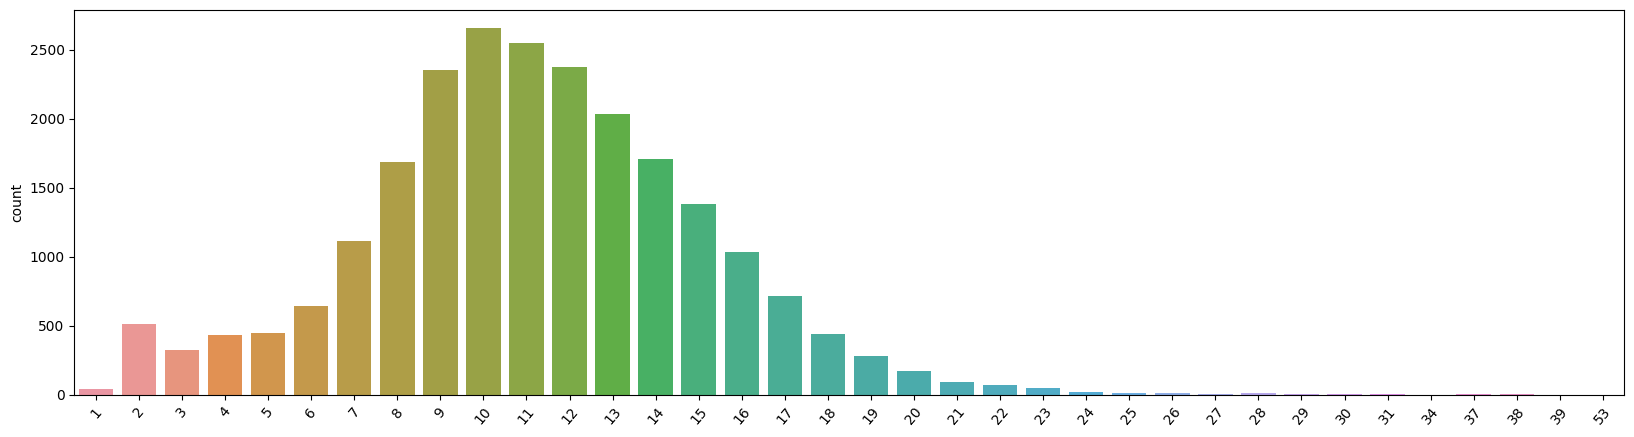

In [8]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [9]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:, [2,-1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Keeping Up with the Kardashians,1
1,Tonya Harding,1
2,Gwyneth Paltrow Says Brad Pitt Threatened to ‘...,0
3,HGTV Life Styled,1
4,Selena Gomez and Demi Lovato Reunite at the ‘I...,1
...,...,...
23191,Larry English Net Worth,1
23192,Famous Young Hollywood Stars: Then And Now,1
23193,‘Aquaman': See First Look of Nicole Kidman as ...,1
23194,Angelina Jolie Travels to Jordan with Daughter...,1


In [10]:
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

trainset size: (18557, 2)
valset size: (4639, 2)


In [11]:
# check for null titles
train_df['title'].isnull().sum()
val_df['title'].isnull().sum()

0

In [12]:
# DataFrame to csv
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

In [13]:

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')



In [14]:

# no null values in dataset
train_df['title'].isnull().sum()

0

In [15]:
val_df['title'].isnull().sum()

0

In [16]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 13975
Train fake news: 4582
Val real news: 3466
Val fake news: 1173


In [17]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'Pete Davidson And Ariana Grande Are Already Talking About Having Kids'

In [18]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

'Everything Miranda Lambert and Blake Shelton Have Said About Their Divorce'

In [19]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    18557.000000
mean        11.148893
std          3.979033
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: title, dtype: float64

In [20]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    4639.000000
mean       11.210390
std         3.972378
min         1.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        34.000000
Name: title, dtype: float64

In [21]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [23]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ishraq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Watch the moment a disappointed groom mutters ...,1,watch moment disappointed groom mutter oh see ...
1,Camila Mendes Sends Condolences to High School...,1,camila mendes sends condolence high school sho...
2,Ryan Seacrest Tapped as Kelly Ripa’s Permanent...,1,ryan seacrest tapped kelly ripa permanent co h...
3,Kate Middleton First Days With Baby 3,0,kate middleton first day baby 3
4,Nicole Williams weds Larry English in Laguna B...,1,nicole williams wed larry english laguna beach
...,...,...,...
18552,All of Khloe Kardashian's glorious baby bump p...,1,khloe kardashian glorious baby bump photo far
18553,See Kathie Lee Gifford debut her new song ‘He ...,0,see kathie lee gifford debut new song saw jesu...
18554,Did Karlie Kloss Just Reveal Princess Beatrice...,1,karlie kloss reveal princess beatrice secret i...
18555,Image Overhaul! Kim Hiring New Team To Seem Mo...,0,image overhaul kim hiring new team seem political


In [26]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df


,title,true,preprocessed_title
0,Angelina Jolie Is Secretly Dating Real Estate ...,0,angelina jolie secretly dating real estate agent
1,Tinsley Mortimer Reveals Her Current Status wi...,1,tinsley mortimer reveals current status scott ...
2,Jeff Goldblum and Emilie Livingston Welcome So...,1,jeff goldblum emilie livingston welcome son river
3,Inside Jennifer Lopez and Alex Rodriguez' lavi...,0,inside jennifer lopez alex rodriguez lavish ba...
4,How a failed blind date led Mila Kunis to love...,1,failed blind date led mila kunis love ashton k...
...,...,...,...
4634,World's most popular candy to be removed from ...,0,world popular candy removed shelf october 2017
4635,Princess Eugenie shows off her stunning engage...,1,princess eugenie show stunning engagement ring...
4636,Madonna Faced ‘Uncomfortable Questions’ Over M...,0,madonna faced uncomfortable question malawi ad...
4637,Larry English Net Worth,1,larry english net worth


In [27]:
print('FakeNewsNet length:', len(val_df))

FakeNewsNet length: 4639


In [28]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (18557,) (18557,)
Test data: (4639,) (4639,)


In [29]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (18557, 2706)
X_test_news_tfidf shape: (4639, 2706)


|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.8908    | 0.3808    |
| 2         | 0.8888    | 0.9512    |
| 3         | 0.8894    | 0.7347    |
| 4         | 0.89      | 0.6027    |
| 5         | 0.8901    | 0.1645    |
| 6         | 0.8903    | 0.3124    |
| 7         | 0.8907    | 0.3765    |
| 8         | 0.8903    | 0.3124    |
| 9         | 0.8904    | 0.4127    |
| 10        | 0.8902    | 0.2551    |
| 11        | 0.889     | 0.06586   |
| 12        | 0.8897    | 0.4993    |
| 13        | 0.8891    | 0.8378    |
| 14        | 0.8906    | 0.21      |
| 15        | 0.8897    | 0.6591    |


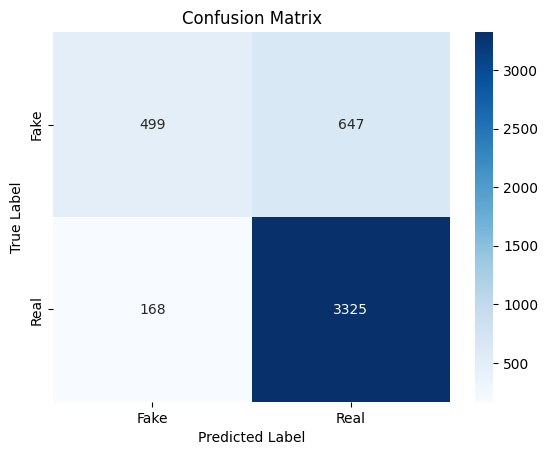

Best alpha: 0.3807947176588889
Accuracy: 0.824315585255443
Precision: 0.8371097683786506
Recall: 0.9519038076152304
F1-Score: 0.8908238446081714


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from bayes_opt import BayesianOptimization


# Define the Naive Bayes model training and evaluation function
def evaluate_naive_bayes(alpha):
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train_news_tfidf, y_train)

    # Predictions on the validation set
    y_pred = clf.predict(X_val_news_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return f1

# Bayesian optimization for alpha (smoothing parameter)
pbounds = {'alpha': (0.01, 1.0)}
optimizer = BayesianOptimization(
    f=evaluate_naive_bayes,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_alpha = optimizer.max['params']['alpha']

# Train the final model with the best hyperparameters
clf = MultinomialNB(alpha=best_alpha)
clf.fit(X_train_news_tfidf, y_train)

# Predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print('Best alpha:', best_alpha)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)



|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.8737    | 21.85     | 9.556     | 15.18     | 123.7     |
| 2         | 0.8672    | 12.02     | 2.404     | 3.046     | 174.6     |
| 3         | 0.8781    | 32.05     | 7.373     | 2.371     | 194.3     |
| 4         | 0.8805    | 42.46     | 2.911     | 5.273     | 44.85     |
| 5         | 0.8734    | 18.69     | 5.723     | 9.775     | 65.33     |
| 6         | 0.8785    | 40.99     | 4.55      | 4.871     | 43.46     |
| 7         | 0.8846    | 49.46     | 1.0       | 7.54      | 48.95     |
| 8         | 0.8846    | 50.0      | 1.0       | 20.0      | 54.78     |
| 9         | 0.8852    | 50.0      | 1.0       | 5.211     | 67.85     |
| 10        | 0.8806    | 49.7      | 5.152     | 18.06     | 89.34     |
| 11        | 0.8824    | 50.0      | 1.0       | 20.0      | 10.0      |
| 12        | 0.8596    | 5.249     | 

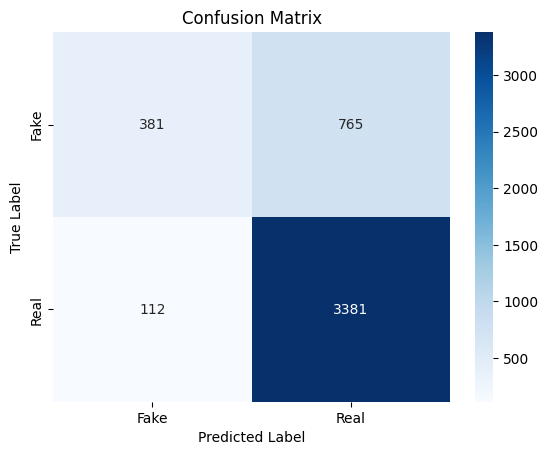

Best hyperparameters: {'max_depth': 50.0, 'min_samples_leaf': 1.0, 'min_samples_split': 5.21075871587798, 'n_estimators': 67.84631349667295}
Accuracy: 0.8109506359129123
Precision: 0.8154848046309696
Recall: 0.9679358717434869
F1-Score: 0.8851943971724048


In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from bayes_opt import BayesianOptimization



# Define the RandomForestClassifier model training and evaluation function
def evaluate_random_forest(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    clf = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42,
    )

    clf.fit(X_train_news_tfidf, y_train)

    # Predictions on the validation set
    y_pred = clf.predict(X_val_news_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return f1

# Bayesian optimization for RandomForestClassifier hyperparameters
pbounds = {'n_estimators': (10, 200),
           'max_depth': (5, 50),
           'min_samples_split': (2, 20),
           'min_samples_leaf': (1, 10)}

optimizer = BayesianOptimization(
    f=evaluate_random_forest,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']

# Train the final model with the best hyperparameters
clf = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42,
)

clf.fit(X_train_news_tfidf, y_train)

# Predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print('Best hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
| 1         | 0.8817    | 0.3808    | 190.6     |
| 2         | 0.8799    | 0.7347    | 123.7     |
| 3         | 0.8694    | 0.1645    | 39.64     |
| 4         | 0.8717    | 0.0675    | 174.6     |
| 5         | 0.8823    | 0.6051    | 144.5     |
| 6         | 0.8821    | 0.6141    | 144.6     |
| 7         | 0.8777    | 0.1836    | 142.3     |
| 8         | 0.8811    | 0.332     | 192.5     |
| 9         | 0.8797    | 0.9889    | 188.5     |
| 10        | 0.8798    | 0.9507    | 194.9     |
| 11        | 0.882     | 0.5907    | 121.0     |
| 12        | 0.8795    | 0.7689    | 119.0     |
| 13        | 0.8652    | 0.01207   | 126.8     |
| 14        | 0.8801    | 0.1986    | 198.5     |
| 15        | 0.8652    | 0.01      | 184.8     |


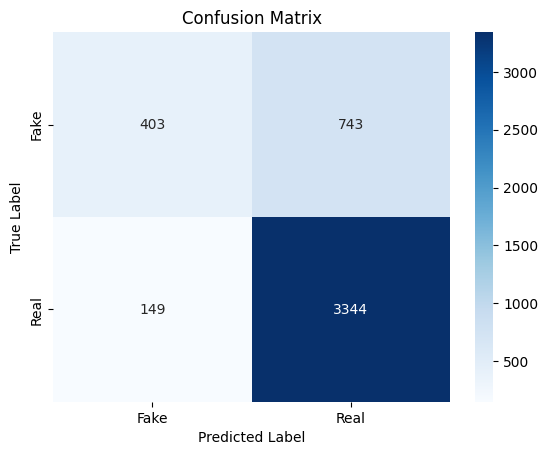

Best hyperparameters: {'learning_rate': 0.6051038616257767, 'n_estimators': 144.53378978124863}
Accuracy: 0.8077171804268162
Precision: 0.8182040616589186
Recall: 0.9573432579444604
F1-Score: 0.8823218997361478


In [36]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization




# Define the AdaBoostClassifier model training and evaluation function
def evaluate_adaboost(n_estimators, learning_rate):
    clf = AdaBoostClassifier(
        n_estimators=int(n_estimators),
        learning_rate=learning_rate,
        random_state=42,
    )

    clf.fit(X_train_news_tfidf, y_train)

    # Predictions on the validation set
    y_pred = clf.predict(X_val_news_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return f1

# Bayesian optimization for AdaBoostClassifier hyperparameters
pbounds = {'n_estimators': (10, 200),
           'learning_rate': (0.01, 1.0)}

optimizer = BayesianOptimization(
    f=evaluate_adaboost,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']

# Train the final model with the best hyperparameters
clf = AdaBoostClassifier(
    n_estimators=int(best_params['n_estimators']),
    learning_rate=best_params['learning_rate'],
    random_state=42,
)

clf.fit(X_train_news_tfidf, y_train)

# Predictions on the validation set
y_pred = clf.predict(X_val_news_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print('Best hyperparameters:', best_params)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)



|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.8998    | 3.752     | 0.9512    |
| 2         | 0.8984    | 7.323     | 0.6027    |
| 3         | 0.8961    | 1.569     | 0.1644    |
| 4         | 0.8969    | 0.5903    | 0.8675    |
| 5         | 0.8991    | 6.015     | 0.711     |
| 6         | 0.8811    | 4.583     | 0.01      |
| 7         | 0.9002    | 3.723     | 0.9309    |
| 8         | 0.9012    | 2.955     | 1.0       |
| 9         | 0.8983    | 2.93      | 0.1537    |
| 10        | 0.8984    | 8.774     | 0.9602    |
| 11        | 0.8937    | 9.802     | 0.01807   |
| 12        | 0.8853    | 6.598     | 0.01      |
| 13        | 0.9028    | 2.281     | 0.9304    |
| 14        | 0.9022    | 1.663     | 1.0       |
| 15        | 0.8981    | 8.233     | 0.08916   |


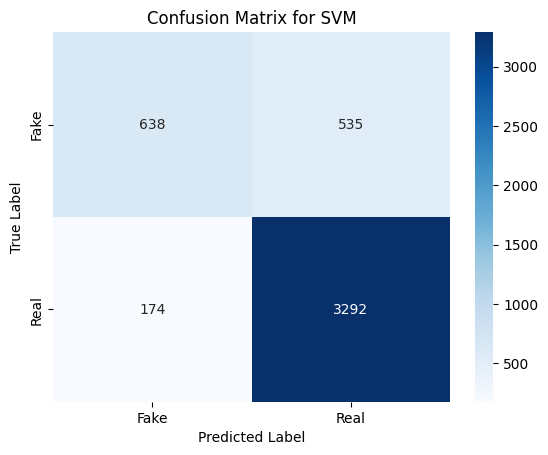

Best hyperparameters for SVM: {'C': 2.280831424151729, 'gamma': 0.930397032202244}
Accuracy for SVM: 0.847165337357189
Precision for SVM: 0.8602038149986935
Recall for SVM: 0.949798038084247
F1-Score for SVM: 0.9027834910187852


In [30]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from bayes_opt import BayesianOptimization

# Define the SVM model training and evaluation function
def evaluate_svm(C, gamma):
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train_news_tfidf, y_train)

    # Predictions on the validation set
    y_pred = clf.predict(X_val_news_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    return f1

# Bayesian optimization for SVM hyperparameters
pbounds_svm = {'C': (0.01, 10),
               'gamma': (0.01, 1.0)}

optimizer_svm = BayesianOptimization(
    f=evaluate_svm,
    pbounds=pbounds_svm,
    verbose=2,
    random_state=42,
)

optimizer_svm.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params_svm = optimizer_svm.max['params']

# Train the final model with the best hyperparameters
clf_svm = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'])
clf_svm.fit(X_train_news_tfidf, y_train)

# Predictions on the validation set
y_pred_svm = clf_svm.predict(X_val_news_tfidf)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

# Plot the confusion matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

# Print evaluation metrics for SVM
print('Best hyperparameters for SVM:', best_params_svm)
print('Accuracy for SVM:', accuracy_svm)
print('Precision for SVM:', precision_svm)
print('Recall for SVM:', recall_svm)
print('F1-Score for SVM:', f1_svm)
